In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
img = plt.imread('semantic_kitti_seqs.png')

In [3]:
img.shape

(805, 1791, 4)

In [4]:
from data.semantic_kitti import dataset_names

In [5]:
!xrandr | grep -w connected

eDP-1 connected primary 1920x1080+0+0 (normal left inverted right x axis y axis) 344mm x 193mm
HDMI-1-0 connected 1920x1200+1920+0 (normal left inverted right x axis y axis) 518mm x 324mm


In [6]:
w_cm, h_cm = 34.4, 19.3
w_ic, h_ic = w_cm / 2.54, h_cm / 2.54

In [7]:
1920 / w_ic, 1080 / h_ic

(141.7674418604651, 142.13471502590673)

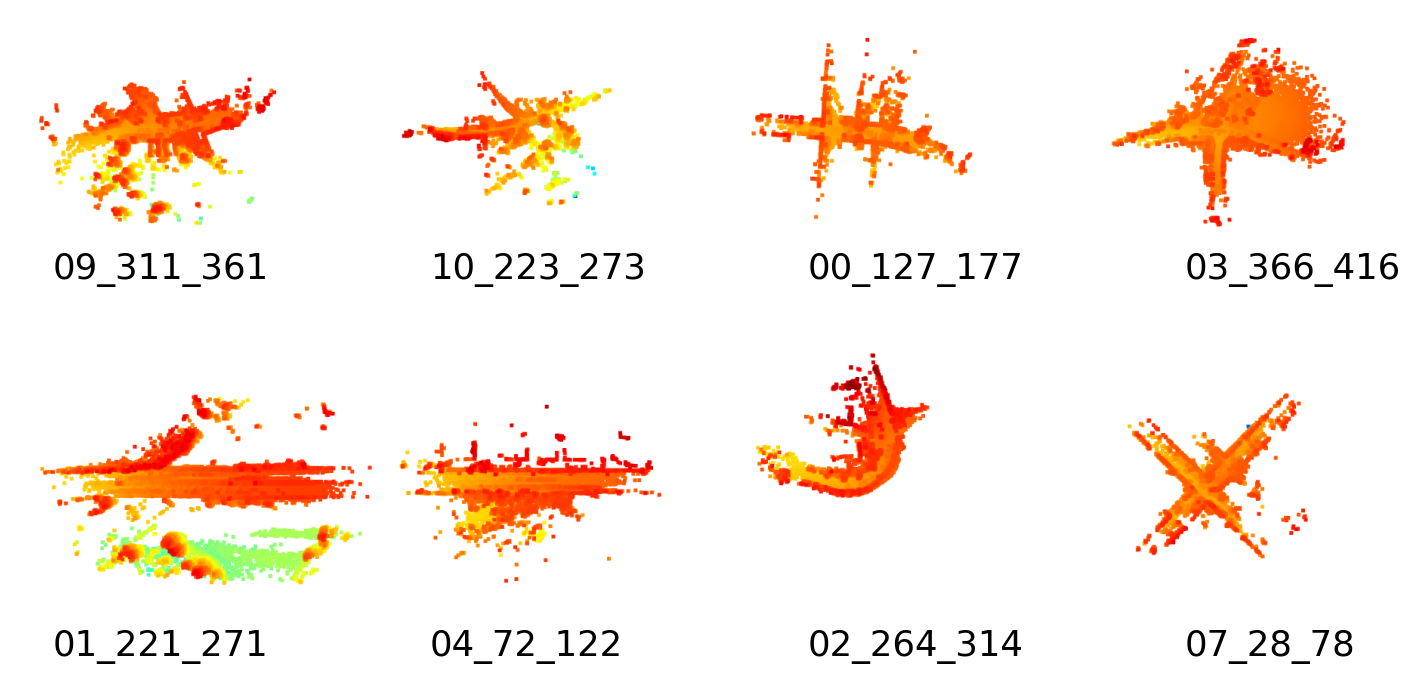

In [8]:
DPI = 142
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(img.shape[1]/DPI, img.shape[0]/DPI), dpi=DPI)
# plt.grid()
plt.axis('off')
plt.imshow(img)

x, y = 50, 350
for i, name in enumerate(dataset_names):
    for s in ['_start_', '_end_', '_step_']:
        name = name.replace(s, '_')
    name = name[:-2]
    
    plt.text(x, y, name, bbox=dict(fill=False, edgecolor=None, linewidth=0))
    
    if i == len(dataset_names) / 2 - 1:
        y += 500
        x = -450
    x += 500

plt.savefig('semantic_kitti_seqs_labeled.png', dpi=DPI)

In [9]:
import torch
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

In [10]:
N = 100
z = 1.0

# pts = 10*np.random.random((N, 3))-5
pts = 10*torch.rand((3, N))-5
pts[2, :] = z

In [11]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pts.transpose(1, 0))
o3d.visualization.draw_geometries([pcd])

In [12]:
cov = torch.cov(pts)
eigvals = torch.linalg.eigvalsh(cov)

In [13]:
eigvals

tensor([ 0.0000,  6.7550, 10.0741])

In [14]:
torch.abs(eigvals)

tensor([ 0.0000,  6.7550, 10.0741])